# Importing Required Libraries & Datasets

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

In [214]:
sns.set(rc={'figure.figsize':(15,10)})
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

In [215]:
raw_data = pd.read_csv('loan.csv', index_col='id')

In [216]:
original_csv_file_shape = raw_data.shape

# ==> 1. Cleaning Data <==

### 1.1 Finding Columns With All Null Values

In [217]:
more_than_50_percent = round(raw_data.isnull().sum()/len(raw_data)*100, 2)
more_than_50_percent.sort_values(ascending=False)

total_il_high_credit_limit        100.00
mo_sin_old_rev_tl_op              100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
total_bc_limit                    100.00
dti_joint       

##### We can safely drop the columns which have missing values more than 50%

In [218]:
raw_data = raw_data.drop(more_than_50_percent[more_than_50_percent > 50].index, axis=1)

In [219]:
(raw_data.isnull().sum()/len(raw_data)*100).sort_values(ascending=False).head(20)

desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
int_rate                       0.000000
loan_amnt                      0.000000
purpose                        0.000000
funded_amnt                    0.000000
url                            0.000000
funded_amnt_inv                0.000000
pymnt_plan                     0.000000
loan_status                    0.000000
issue_d                        0.000000
dtype: float64

### 1.2 From the above numbers, lets start analysing each column which has missing value.

#### 1.2.1 Describe: On carefully reading the describe column, we can infer that, values in that column are some what representing the same as that of purpose column. And since purpose column has no null value, we can go ahead by dropping desc column and keeping purpose column

In [220]:
raw_data = raw_data.drop(columns=['desc'])

#### 1.2.2 Employee Title: This column contains the information on job titles of people who have applied for loan, this could be usefull. We should not remove column, instead we can drop the missing values.

In [221]:
raw_data = raw_data[~raw_data.emp_title.isnull()]

#### 1.2.3 Employee Length: This column consists of information on professional experiance of employee and this could be useful parameter. We should not remove this column, instead we can drop the missing values.

In [222]:
raw_data = raw_data[~raw_data.emp_length.isnull()]

#### 1.2.4 Public Record Bankruptcies: This column consists of data related to bankruptcy. Though small, it can be decisive factor, hence dropping the missing rows.

In [223]:
raw_data = raw_data[~raw_data.pub_rec_bankruptcies.isnull()]

#### 1.2.5 Last Month Payment Done: Dropping the rows with missing values, as missing value percentage is negligible

In [224]:
raw_data = raw_data[~raw_data.last_pymnt_d.isnull()]

#### 1.2.6 Revolving Line Utilization Rate: Dropping the rows with missing values, as missing value percentage is negligible

In [225]:
raw_data = raw_data[~raw_data.revol_util.isnull()]

#### 1.2.7 Loan Title: Dropping the rows with missing values, as missing value percentage is negligible. Also, it is kind of an additional comments for which the loan is required, which is again very much covered under 'purpose' column

In [226]:
raw_data = raw_data[~raw_data.title.isnull()]

#### 1.2.8 Recent Month LC pulled: Dropping the rows with missing values, as missing value percentage is negligible

In [227]:
raw_data = raw_data[~raw_data.last_credit_pull_d.isnull()]

#### 1.2.9 Other Columns

In [228]:
raw_data.tax_liens.describe()

count    36433.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [229]:
raw_data.chargeoff_within_12_mths.describe()

count    36431.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [230]:
raw_data.collections_12_mths_ex_med.describe()

count    36431.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

##### This columns have all the values as zero so this column is of no use, lets remove this column.

In [231]:
raw_data = raw_data.drop(columns=['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med'], axis=1)

### 1.4 Payment Plan Column consists of only one value i.e. 'n', so we can drop the same

In [232]:
raw_data = raw_data.drop(columns=['pymnt_plan'])

### 1.5 Initial List Status Column consists of only one value i.e. 'f', so we can drop the same

In [233]:
raw_data = raw_data.drop(columns=['initial_list_status'])

### 1.6 Policy Code Column consists of only one value i.e. 1, so we can drop the same

In [234]:
raw_data = raw_data.drop(columns=['policy_code'])

### 1.7 Application Type consists of only one value i.e. 'INDIVIDUAL', so we can drop the same

In [235]:
raw_data = raw_data.drop(columns=['application_type'])

### 1.8 The number of accounts on which the borrower is now delinquent & past-due amount owed column consists of only one value, so we can drop the same

In [236]:
raw_data = raw_data.drop(columns=['acc_now_delinq','delinq_amnt'])

### 1.9 Analysing Dataframe after dropping Rows & Columns

In [237]:
print('Percentage of Rows removed for entire Raw CSV File accounts to', round((1-raw_data.shape[0]/original_csv_file_shape[0])*100, 2), '%')

Percentage of Rows removed for entire Raw CSV File accounts to 8.27 %


In [238]:
print('Percentage of Columns removed for entire Raw CSV File accounts to', round((1-raw_data.shape[1]/original_csv_file_shape[1])*100, 2), '%')

Percentage of Columns removed for entire Raw CSV File accounts to 60.91 %


# ==> 2. Formating Data In Columns <==

### This step involves formatting data and converting them into respective formats and creating new categorical columns (if required) which can be easily considered for quick calculations.

In [239]:
def extract_valid_float_from_cell(row):
    row = re.sub('[%, ]', '', str(row))
    return float(row)

### 2.1 Creating New Column of Funding Category on the basis of 'Funding Amount'

In [240]:
raw_data['funded_amount_category'] = raw_data['funded_amnt'].apply(lambda x: math.ceil(x/1000.00) * 1000)

### 2.2 Formatting Loan Term Column

In [241]:
def extract_valid_month_from_months_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    return int(row)

In [242]:
raw_data['term'] = raw_data.term.apply(extract_valid_month_from_months_column)

### 2.3 Formatting Interest Column to Float Value & also creating new categorical variable

In [243]:
raw_data['int_rate'] = raw_data.int_rate.apply(extract_valid_float_from_cell)

In [244]:
raw_data['int_rate_category'] = raw_data['int_rate'].apply(lambda x: math.ceil(x))

### 2.4 Formatting Installment Column

In [245]:
raw_data['installment'].dtype

dtype('float64')

##### No need to format Insallment Column as it is already in correct format (float value)

### 2.5 Creating newly mapped Grade Column

In [246]:
grade_list = list(raw_data['grade'].unique())
grade_list.sort()

In [247]:
grade_dict_mapped = {value:index for index, value in enumerate(grade_list)}

In [248]:
raw_data['grade_mapped'] = raw_data['grade'].map(grade_dict_mapped)

### 2.6 Formatting Sub-Grade Column

##### While comparing Grade & Sub-Grade column, it is observed that, alphabet in Sub-Grade column is same as alphabet in Grade Column. This can be verified by printing rows where value of "Grade" column is not equal to alphabet in "Sub-Grade" column. (If there are no values i.e. count is zero, while comparing this, we can be assured to drop alphabet from Sub-Grade column)

In [249]:
raw_data[raw_data['grade'] != raw_data.sub_grade.apply(lambda x: x[:1])].grade.count()

0

##### So, we will proceed ahead with creating a new column which have only the number present in sub-grade column

In [250]:
def remove_alphabet_from_sub_grade_column(row):
    row = re.sub('[A-Za-z]', '', str(row))
    return int(row)

In [251]:
raw_data['sub_grade_only_number'] = raw_data.sub_grade.apply(remove_alphabet_from_sub_grade_column)

### 2.8 Formatting Employee Title

In [252]:
raw_data['emp_title_new'] = raw_data['emp_title'].apply(lambda x: x.lower().replace('.', ''))

In [253]:
raw_data['emp_title_new'] = raw_data['emp_title_new'].apply(lambda x: x.replace('united states', 'us') if 'united states' in x else x)

In [254]:
raw_data['emp_title_new'] = raw_data['emp_title_new'].apply(lambda x: x.replace('u s', 'us') if 'u s ' in x else x)

In [255]:
raw_data['emp_title_new'] = raw_data['emp_title_new'].replace("jpmorgan chase", "jp morgan chase")
raw_data['emp_title_new'] = raw_data['emp_title_new'].replace("self", "self employed")
raw_data['emp_title_new'] = raw_data['emp_title_new'].replace("self-employed", "self employed")
raw_data['emp_title_new'] = raw_data['emp_title_new'].replace("wal-mart", "walmart")
raw_data['emp_title_new'] = raw_data['emp_title_new'].replace("wal mart", "walmart")
raw_data['emp_title_new'] = raw_data['emp_title_new'].replace("att", "at&t")

In [256]:
raw_data['emp_title_new'].value_counts()

us army                                                                           291
self employed                                                                     136
bank of america                                                                   136
us air force                                                                      115
walmart                                                                           113
us postal service                                                                 109
at&t                                                                               89
jp morgan chase                                                                    89
us navy                                                                            79
kaiser permanente                                                                  68
ibm                                                                                68
wells fargo                                           

### 2.9 Formatting Employee Length (Years of Experience) Column

In [257]:
def clean_employee_length_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    if row == '<1':
        return 0
    elif row == '10+':
        return 10
    elif row == '':
        return np.nan
    else:
        return float(row)

In [258]:
raw_data['emp_length'] = raw_data.emp_length.apply(clean_employee_length_column)

### 2.10 Formatting Ownership Column (Creating new mapped column)

In [259]:
ownership_status_list = list(raw_data.home_ownership.unique())
ownership_status_list.sort()

In [260]:
ownership_dict = {value: index for index, value in enumerate(ownership_status_list)}
ownership_dict

{'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}

In [261]:
raw_data['home_ownership_mapped'] = raw_data.home_ownership.map(ownership_dict)

### 2.11 Formatting Annual Income / Salary Column (Creating new mapped column)

In [262]:
raw_data['annual_inc'].dtype

dtype('float64')

##### No need to format Annual Income Column as it is already in correct format (float value)

In [263]:
raw_data['annual_inc_category'] = raw_data['annual_inc'].apply(lambda x: math.ceil(x/50000.00) * 50000)

### 2.12 Formatting Salary Verification Column (Creating new mapped column)

In [264]:
salary_verify_status_list = list(raw_data.verification_status.unique())
salary_verify_status_list.sort()

In [265]:
income_verification_dict = {value: index for index, value in enumerate(salary_verify_status_list)}
income_verification_dict

{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}

In [266]:
raw_data['verification_status_mapped'] = raw_data.verification_status.map(income_verification_dict)

### 2.13 Formatting Loan Issue Date to datetime object & Creating Seperate Column for Month & Year

In [267]:
raw_data['issue_d'] = pd.to_datetime(raw_data.issue_d, format='%b-%y')

In [268]:
raw_data['issue_d_year'] = pd.DatetimeIndex(raw_data['issue_d']).year

In [269]:
raw_data['issue_d_month'] = pd.DatetimeIndex(raw_data['issue_d']).month

### 2.14 Formatting Loan Status Column (Creating new mapped column) 

In [270]:
loan_status_list = list(raw_data.loan_status.unique())
loan_status_list.sort()

In [271]:
loan_status_dict = {value: index for index, value in enumerate(loan_status_list)}
loan_status_dict

{'Charged Off': 0, 'Current': 1, 'Fully Paid': 2}

In [272]:
raw_data['loan_status_mapped'] = raw_data.loan_status.map(loan_status_dict)

### 2.15 Formatting Purpose Column

In [273]:
raw_data['purpose'] = raw_data.purpose.apply(lambda x: x.replace('_', ' ').title())

### 2.16 Mapping Address State Column With Complete State Name

##### Creating a dictionary of all the states In US and their respective state abbreviation

In [274]:
full_state_list = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [275]:
raw_data['addr_state_name'] = raw_data.addr_state.map(full_state_list)

### 2.17 Creating DTI Category Column

In [276]:
raw_data['dti'].dtype

dtype('float64')

##### No need to format DTI Column as it is already in correct format (float value)

In [277]:
raw_data['dti_category'] = raw_data['dti'].apply(lambda x: math.ceil(x))

### 2.18 Analysing Delinq 2 Years Column

In [278]:
raw_data['delinq_2yrs'].dtype

dtype('int64')

##### No need to format Delinq 2 Years Column as it is already in correct format (float value)

### 2.19 Formatting Earliest Credit Line Column to Valid Date object

In [279]:
raw_data['earliest_cr_line'] = pd.to_datetime(raw_data.earliest_cr_line, format='%b-%y')

In [280]:
raw_data['earliest_cr_line_month'] = pd.DatetimeIndex(raw_data['earliest_cr_line']).month

In [281]:
raw_data['earliest_cr_line_year'] = pd.DatetimeIndex(raw_data['earliest_cr_line']).year

In [282]:
raw_data['earliest_cr_line_year'] = raw_data.earliest_cr_line_year.apply(lambda x: x-100 if (x > pd.datetime.now().year) else x)

<ipython-input-282-35b737f62bde>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  raw_data['earliest_cr_line_year'] = raw_data.earliest_cr_line_year.apply(lambda x: x-100 if (x > pd.datetime.now().year) else x)


##### After converting year to proper format, we should drop 'earliest_cr_line' column to avoid data duplicacy issues.

In [283]:
raw_data = raw_data.drop(columns=['earliest_cr_line'])

### 2.20 Creating Categorical Column For Revolving Balance

In [284]:
raw_data['revol_bal_category'] = raw_data['revol_bal'].apply(lambda x: math.ceil(x/2000.00) * 2000)

In [285]:
raw_data['revol_bal'].dtype

dtype('int64')

##### No need to format Revolving Balance Column as it is in proper format

### 2.21 Cleaning Revolving Utlization Percent Column & Creating Categorical Column For the same.

In [286]:
raw_data['revol_util'] = raw_data.revol_util.apply(extract_valid_float_from_cell)

In [287]:
raw_data['revol_util_category'] = raw_data['revol_util'].apply(lambda x: (math.ceil(x/10.00) * 10) if not np.isnan(x) else np.nan)

### 2.22 Categorizing Total Number of Credit Lines column

In [288]:
raw_data['total_acc_category'] = raw_data['total_acc'].apply(lambda x: math.ceil(x/5.00) * 5)

### 2.23 Categorizing Remaining outstanding principal column

In [289]:
raw_data['out_prncp_category'] = raw_data['out_prncp'].apply(lambda x: math.ceil(x/100.00) * 100)

### 2.24 Categorizing Outstanding Principal for Portion of Total Amount Funded by Investors Column

In [290]:
raw_data['out_prncp_inv_category'] = raw_data['out_prncp_inv'].apply(lambda x: math.ceil(x/100.00) * 100)

### 2.25 Analysing Following Columns (if they are needed to format)

In [291]:
raw_data.total_pymnt.dtype

dtype('float64')

In [292]:
raw_data.total_pymnt_inv.dtype

dtype('float64')

In [293]:
raw_data.total_rec_prncp.dtype

dtype('float64')

In [294]:
raw_data.total_rec_int.dtype

dtype('float64')

In [295]:
raw_data.total_rec_late_fee.dtype

dtype('float64')

In [296]:
raw_data.recoveries.dtype

dtype('float64')

In [297]:
raw_data.collection_recovery_fee.dtype

dtype('float64')

##### All the above listed columns seems to be in right format, hence no need of any conversion

### 2.26 Formatting Last Payment & Last Credit Pull Date Column to Valid format

In [298]:
raw_data['last_pymnt_d'] = pd.to_datetime(raw_data.last_pymnt_d, format='%b-%y')

In [299]:
raw_data['last_credit_pull_d'] = pd.to_datetime(raw_data.last_credit_pull_d, format='%b-%y')

### 2.27 Creating New Column As Percentage of Open Credit Lines Compared With Available Credit Lines

In [300]:
raw_data['ratio_of_credit_line'] = raw_data['open_acc'] / raw_data['total_acc'] * 100

In [301]:
raw_data['ratio_of_credit_line_category'] = raw_data['ratio_of_credit_line'].apply(lambda x: math.ceil(x/5.00) * 5)

# ==> 3. Comparing Data Between Charged Off & Fully Paid Customers <==

### 3.1 Analysing Percentage of Members which are charged off on the basis of "funded_amount" column.

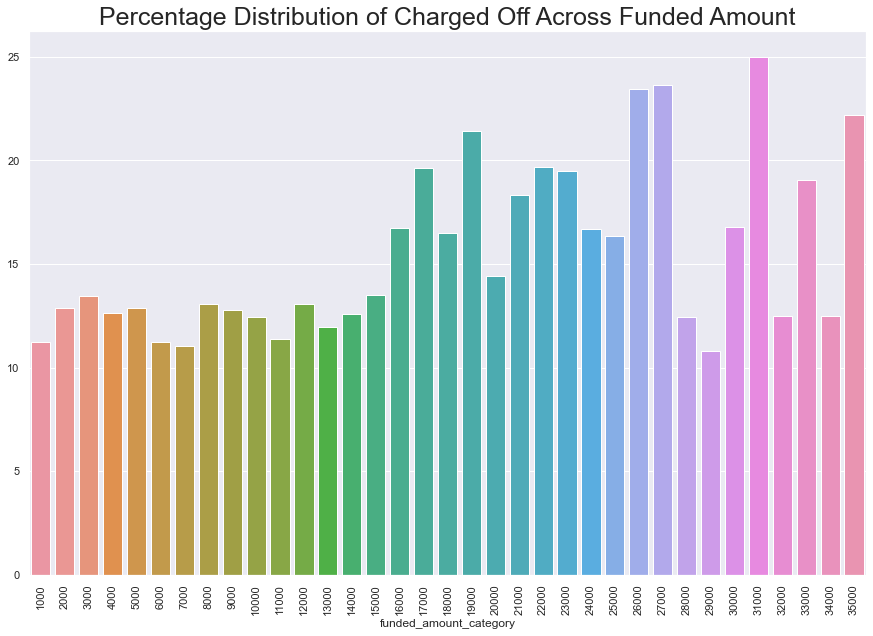

In [302]:
funded_amount_df = raw_data.pivot_table(index='funded_amount_category', columns='loan_status', values='member_id', aggfunc='count')
funded_amount_df['total'] = funded_amount_df.sum(axis=1)
funded_amount_df = funded_amount_df.iloc[:,:-1].div(funded_amount_df["total"], axis=0)*100
chart = sns.barplot(x = funded_amount_df['Charged Off'].index, y=funded_amount_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Funded Amount", fontdict={'fontsize': 25})
plt.show()
# funded_amount_df

##### We see that, as the funding amount increases, proportion of members getting default also increases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [303]:
headers = ['Funding Amount', 'Charged Off']
pd.DataFrame(np.corrcoef(funded_amount_df.index, funded_amount_df["Charged Off"]), index=headers, columns=headers)

,Funding Amount,Charged Off
Funding Amount,1.000000,0.553918
Charged Off,0.553918,1.000000


### 3.2 Analysing Percentage of Members which are charged off on the basis of "term" column.

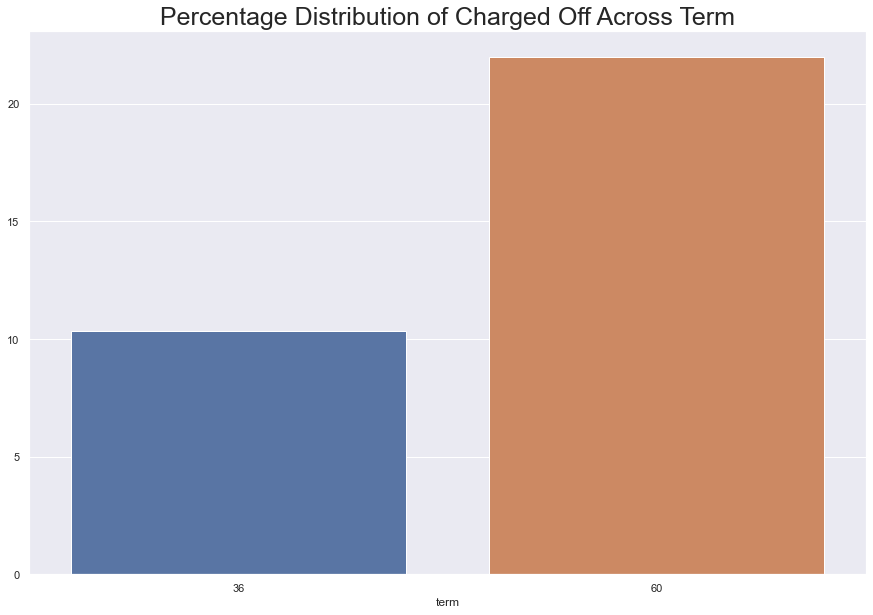

In [304]:
term_df = raw_data.pivot_table(index='term', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
term_df['total'] = term_df.sum(axis=1)
term_df = term_df.iloc[:,:-1].div(term_df["total"], axis=0)*100
chart = sns.barplot(x = term_df['Charged Off'].index, y=term_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Term", fontdict={'fontsize': 25})
plt.show()
# term_df

##### Since, there are only two variables i.e. 36 & 60, we will get corelation co-efficient to be 1

### 3.3 Analysing Percentage of Members which are charged off on the basis of "Interest Rate" column.

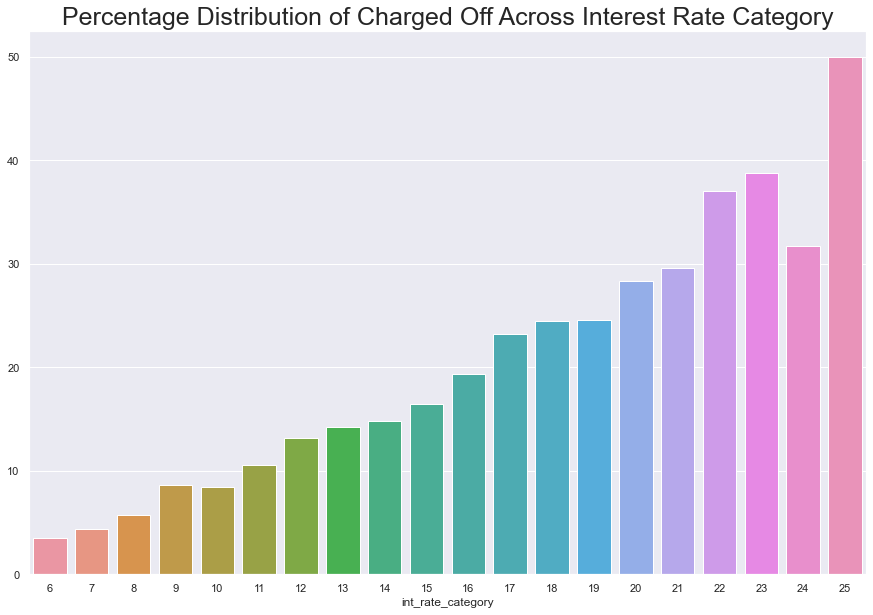

In [305]:
interest_rate_df = raw_data.pivot_table(index='int_rate_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
interest_rate_df['total'] = interest_rate_df.sum(axis=1)
interest_rate_df = interest_rate_df.iloc[:,:-1].div(interest_rate_df["total"], axis=0)*100
chart = sns.barplot(x = interest_rate_df['Charged Off'].index, y=interest_rate_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Interest Rate Category", fontdict={'fontsize': 25})
plt.show()
# interest_rate_df

##### We see that, as the Interest increases, proportion of members getting default also increases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [306]:
headers = ['Interest Rate', 'Charged Off']
pd.DataFrame(np.corrcoef(interest_rate_df.index, interest_rate_df["Charged Off"]), index=headers, columns=headers)

,Interest Rate,Charged Off
Interest Rate,1.000000,0.965641
Charged Off,0.965641,1.000000


### 3.4 Analysing Percentage of Members which are charged off on the basis of "Grade" column.

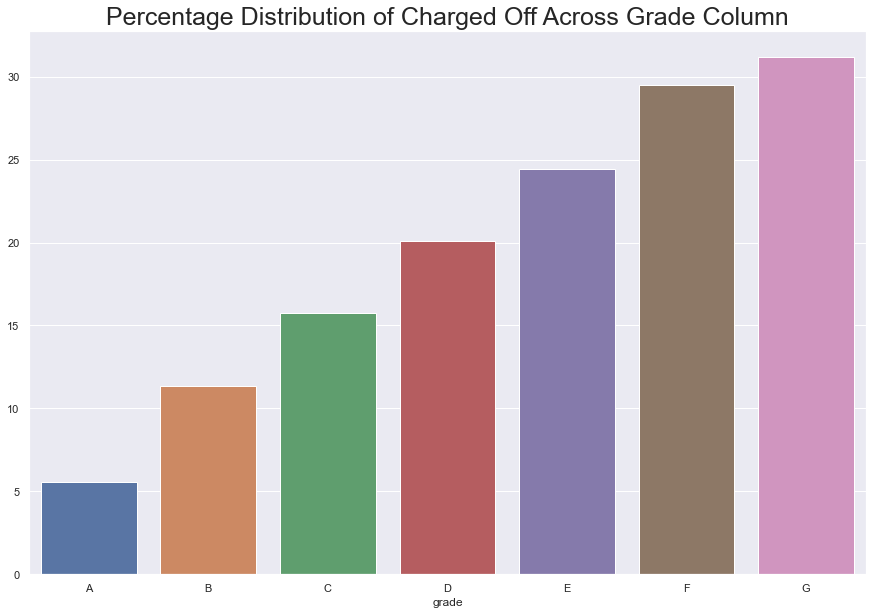

In [307]:
grade_df = raw_data.pivot_table(index='grade', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
grade_df['total'] = grade_df.sum(axis=1)
grade_df = grade_df.iloc[:,:-1].div(grade_df["total"], axis=0)*100
chart = sns.barplot(x = grade_df['Charged Off'].index, y=grade_df['Charged Off'].values)
chart.set_xticklabels(grade_list, rotation=0)
plt.title("Percentage Distribution of Charged Off Across Grade Column", fontdict={'fontsize': 25})
plt.show()
# grade_df

##### We see that, as the Grade Value increases, proportion of members getting default also increases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.
##### But, before this, we will map the index column which are graded A, B, C etc to numbers like 0, 1, 2 etc.

In [308]:
grade_df['new_index'] = grade_df.index.map(grade_dict_mapped)
grade_df = grade_df.set_index('new_index')

In [309]:
headers = ['Grade (Mapped Value)', 'Charged Off']
pd.DataFrame(np.corrcoef(grade_df.index, grade_df["Charged Off"]), index=headers, columns=headers)

,Grade (Mapped Value),Charged Off
Grade (Mapped Value),1.000000,0.994998
Charged Off,0.994998,1.000000


### 3.5 Analysing Percentage of Members which are charged off on the basis of "Sub-Grade (Only Numbers)" columns

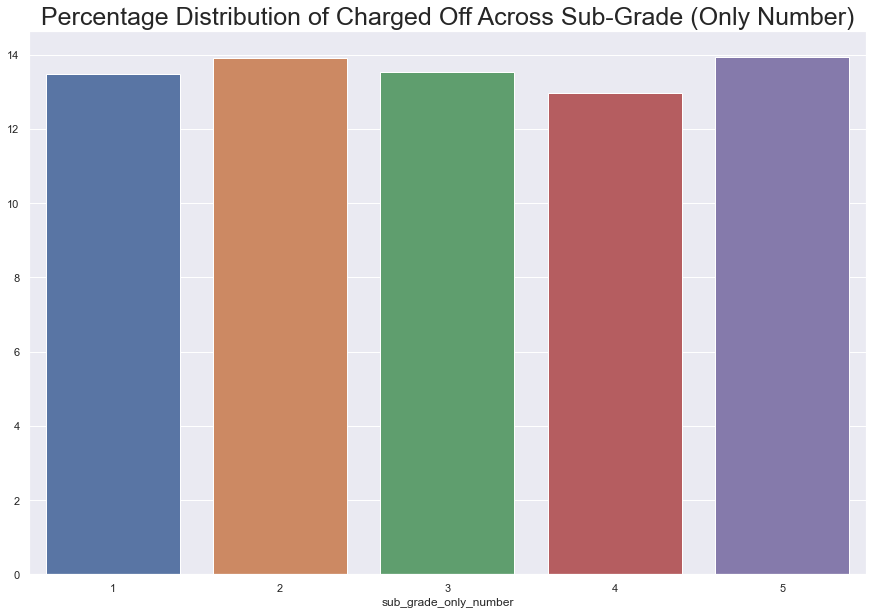

In [310]:
sub_grade_num_df = raw_data.pivot_table(index='sub_grade_only_number', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
sub_grade_num_df['total'] = sub_grade_num_df.sum(axis=1)
sub_grade_num_df = sub_grade_num_df.iloc[:,:-1].div(sub_grade_num_df["total"], axis=0)*100
chart = sns.barplot(x = sub_grade_num_df['Charged Off'].index, y=sub_grade_num_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Sub-Grade (Only Number)", fontdict={'fontsize': 25})
plt.show()
# sub_grade_num_df

##### We don't see that, any specific relation between sub-grade numbers and charged off percent value
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [311]:
headers = ['Grade (Mapped Value)', 'Charged Off']
pd.DataFrame(np.corrcoef(sub_grade_num_df.index, sub_grade_num_df["Charged Off"]), index=headers, columns=headers)

,Grade (Mapped Value),Charged Off
Grade (Mapped Value),1.00000,-0.00792
Charged Off,-0.00792,1.00000


#### Since, the correlation value are very small (almsot equal to 0), we can say that only Sub-Grade Numbers have no relation with Charged Off Percent as a standalone variable.

### 3.6 Analysing Percentage of Members which are charged off on the basis of "Sub-Grade" columns

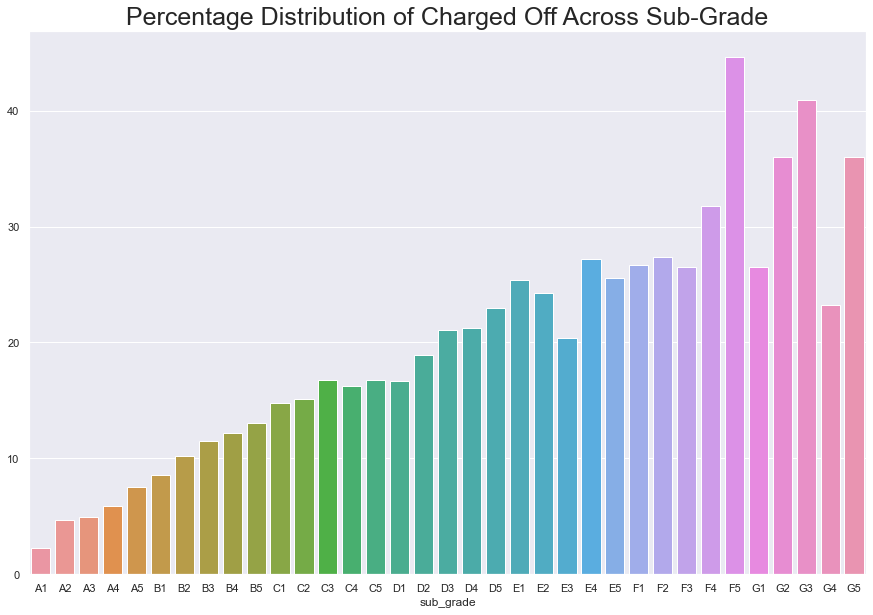

In [312]:
sub_grade_df = raw_data.pivot_table(index='sub_grade', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
sub_grade_df['total'] = sub_grade_df.sum(axis=1)
sub_grade_df = sub_grade_df.iloc[:,:-1].div(sub_grade_df["total"], axis=0)*100
chart = sns.barplot(x = sub_grade_df['Charged Off'].index, y=sub_grade_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Sub-Grade", fontdict={'fontsize': 25})
plt.show()
# sub_grade_df

##### We see that, as the Interest increases, proportion of members getting default also increases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.
##### But, before this, we will map the index column which are graded A1, A2, A3 etc to numbers like 0, 1, 2 etc.

In [313]:
sub_grade_mapped_dict = {value: index for index, value in enumerate(sub_grade_df.index)}

In [314]:
sub_grade_df['new_index'] = sub_grade_df.index.map(sub_grade_mapped_dict)
sub_grade_df = sub_grade_df.set_index('new_index')

In [315]:
headers = ['Sub-Grade', 'Charged Off']
pd.DataFrame(np.corrcoef(sub_grade_df.index, sub_grade_df["Charged Off"]), index=headers, columns=headers)

,Sub-Grade,Charged Off
Sub-Grade,1.000000,0.934748
Charged Off,0.934748,1.000000


### 3.7 Analysing Percentage of Members which are charged off on the basis of "Employee Length" column

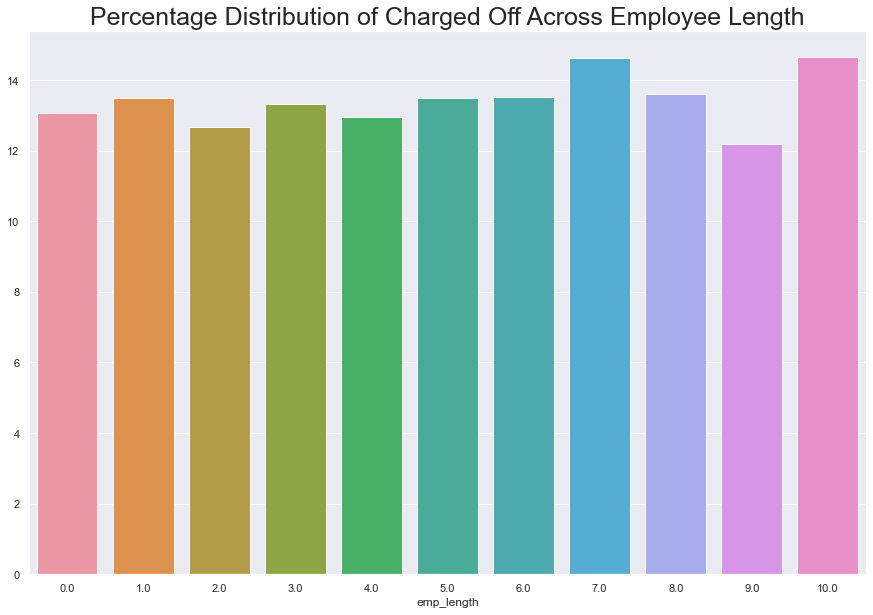

In [316]:
emp_len_df = raw_data.pivot_table(index='emp_length', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
emp_len_df['total'] = emp_len_df.sum(axis=1)
emp_len_df = emp_len_df.iloc[:,:-1].div(emp_len_df["total"], axis=0)*100
chart = sns.barplot(x = emp_len_df['Charged Off'].index, y=emp_len_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Employee Length", fontdict={'fontsize': 25})
plt.show()
# emp_len_df

##### We see that, as the Employee Length increases, proportion of members getting default also increases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [317]:
headers = ['Employee Length', 'Charged Off']
pd.DataFrame(np.corrcoef(emp_len_df.index, emp_len_df["Charged Off"]), index=headers, columns=headers)

,Employee Length,Charged Off
Employee Length,1.000000,0.353912
Charged Off,0.353912,1.000000


### 3.8 Analysing Percentage of Members which are charged off on the basis of "Home Ownership" column

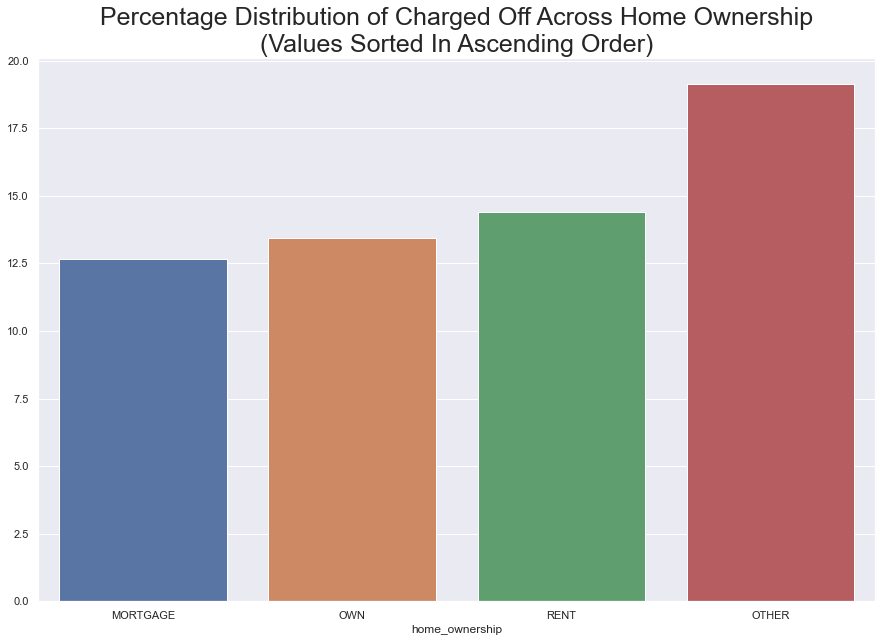

In [318]:
home_own_df = raw_data.pivot_table(index='home_ownership', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
home_own_df['total'] = home_own_df.sum(axis=1)
home_own_df = home_own_df.iloc[:,:-1].div(home_own_df["total"], axis=0)*100
home_own_df = home_own_df.sort_values(by=['Charged Off'])
chart = sns.barplot(x = home_own_df['Charged Off'].index, y=home_own_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Home Ownership\n(Values Sorted In Ascending Order)", fontdict={'fontsize': 25})
plt.show()
# home_own_df

##### The order of Mortgage, Rent, Own & Others is not fixed. So it is very much important for now to assign them a certain order, so that we can infer as to how the charge off percent varies according to house owned
##### For this, we will assume that person with house already owned as the the person who is more stable and lesser probability of charge off, hence we can assign that person with the value of 3.
##### After that, we can assume Mortgage property at next level i.e. 2. This is mostly because, the one who is currently on mortageged ;and implifies that some other institute has given that peson loan because that person seems to be more stable, but lesser than the one who already owns one.
##### After that, we can assume Rent with value of 1 & finally Other with value of 0

In [319]:
home_own_df['new_index'] = home_own_df.index.map({'OWN': 3, 'MORTGAGE': 2, 'RENT': 1, 'OTHER': 0})
home_own_df = home_own_df.set_index('new_index')

In [320]:
headers = ['Home Ownership', 'Charged Off']
pd.DataFrame(np.corrcoef(home_own_df.index, home_own_df["Charged Off"]), index=headers, columns=headers)

,Home Ownership,Charged Off
Home Ownership,1.000000,-0.836958
Charged Off,-0.836958,1.000000


##### Here, wer can infer that, as we move from Owned Appartment ==> Mortgaged Apartment ==> Rented Apartment ==> Other, percentage of charged off members increases.
##### So, people with Owned Apartment are lesser inclined towards defaulting

### 3.9 Analysing Percentage of Members which are charged off on the basis of "Annual Income" column

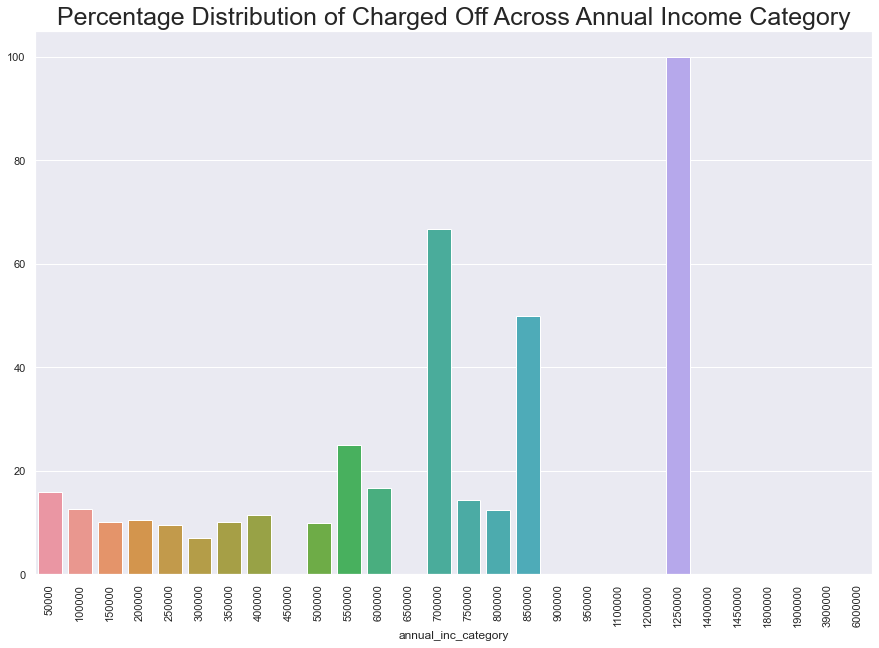

In [321]:
income_df = raw_data.pivot_table(index='annual_inc_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
income_df['total'] = income_df.sum(axis=1)
income_df = income_df.iloc[:,:-1].div(income_df["total"], axis=0)*100
chart = sns.barplot(x = income_df['Charged Off'].index, y=income_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Annual Income Category", fontdict={'fontsize': 25})
plt.show()
# income_df

##### We see that, as the Annual Income increases, proportion of members getting default decreases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [322]:
headers = ['Annual Income', 'Charged Off']
pd.DataFrame(np.corrcoef(income_df.index, income_df["Charged Off"]), index=headers, columns=headers)

,Annual Income,Charged Off
Annual Income,1.000000,-0.158553
Charged Off,-0.158553,1.000000


### 3.10 Analysing Percentage of Members which are charged off on the basis of "Income Verification Status" column

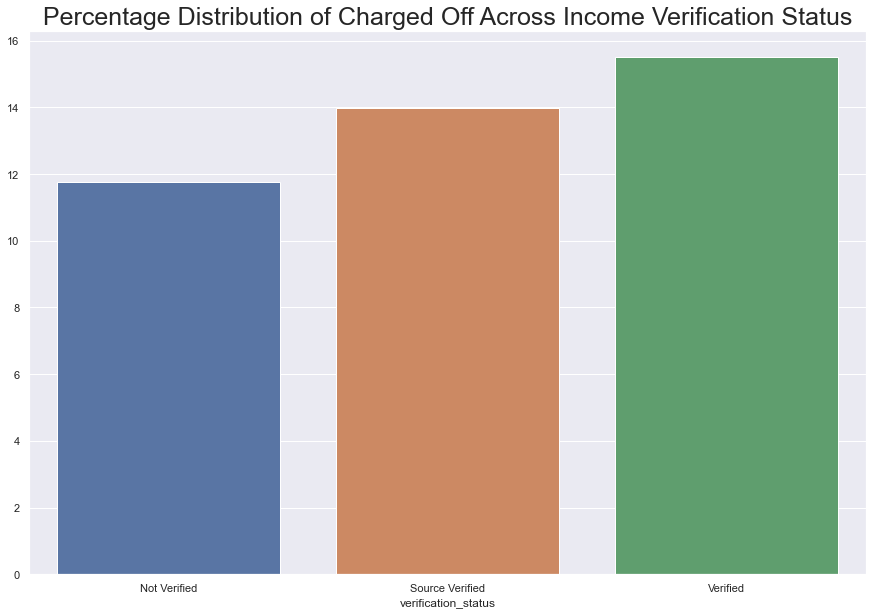

loan_status,Charged Off,Current,Fully Paid
verification_status,,,
Not Verified,11.756111,1.434644,86.809245
Source Verified,13.987938,3.036716,82.975347
Verified,15.520711,4.720778,79.758511


In [323]:
inc_ver_df = raw_data.pivot_table(index='verification_status', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
inc_ver_df['total'] = inc_ver_df.sum(axis=1)
inc_ver_df = inc_ver_df.iloc[:,:-1].div(inc_ver_df["total"], axis=0)*100
chart = sns.barplot(x = inc_ver_df['Charged Off'].index, y=inc_ver_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Income Verification Status", fontdict={'fontsize': 25})
plt.show()
inc_ver_df

##### The order of Income Status is not fixed. So it is very much important for now to assign them a certain order, so that we can infer as to how the charge off percent varies according to Income Verification Status
##### For this, we will assume that person with source verified as the the person who is less likely to default. Because, if the source is verified, it means that bank will qualify that person for certain amount for which he will repay back
##### After that, we can assume Source Verified at next level i.e. 1.
##### After that, we can assume Not Verified at 0

In [324]:
inc_ver_df['new_index'] = inc_ver_df.index.map({'Verified': 2, 'Source Verified': 1, 'Not Verified': 0})
inc_ver_df = inc_ver_df.set_index('new_index')

In [325]:
headers = ['Income Verification Status', 'Charged Off']
pd.DataFrame(np.corrcoef(inc_ver_df.index, inc_ver_df["Charged Off"]), index=headers, columns=headers)

,Income Verification Status,Charged Off
Income Verification Status,1.000000,0.994302
Charged Off,0.994302,1.000000


##### Here we can infer that as the income source type move from Not Verified ==> Source Verified ==> Verified, percentage of Charged off members also increases.

### 3.11 Analysing Percentage of Members which are charged off on the basis of "Issue Date (Year)" column

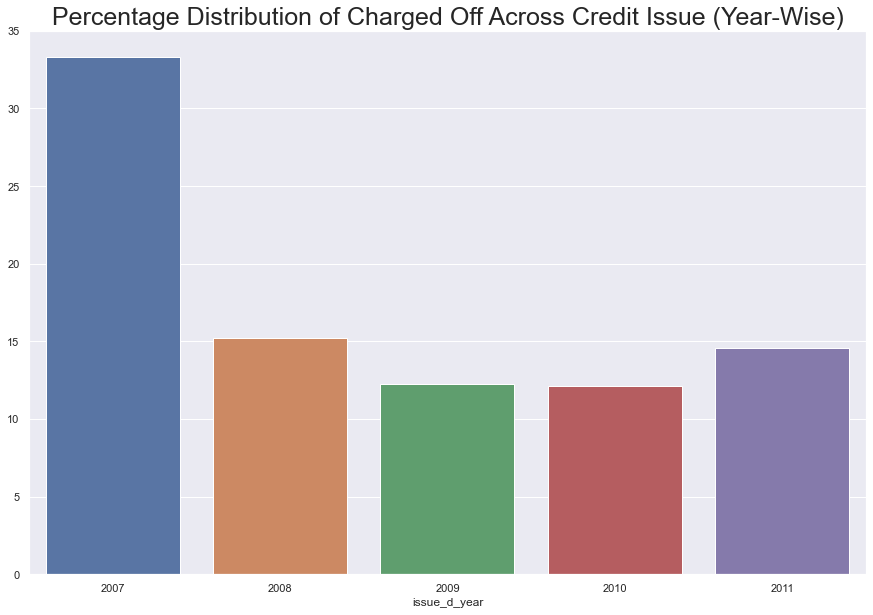

In [326]:
issue_d_year_df = raw_data.pivot_table(index='issue_d_year', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
issue_d_year_df['total'] = issue_d_year_df.sum(axis=1)
issue_d_year_df = issue_d_year_df.iloc[:,:-1].div(issue_d_year_df["total"], axis=0)*100
chart = sns.barplot(x = issue_d_year_df['Charged Off'].index, y=issue_d_year_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Credit Issue (Year-Wise)", fontdict={'fontsize': 25})
plt.show()
# issue_d_year_df

##### We see that, as the Year of Issue Date increases, proportion of members getting default decreases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [327]:
headers = ['Issue Date(Year)', 'Charged Off']
pd.DataFrame(np.corrcoef(issue_d_year_df.index, issue_d_year_df["Charged Off"]), index=headers, columns=headers)

,Issue Date(Year),Charged Off
Issue Date(Year),1.000000,-0.717073
Charged Off,-0.717073,1.000000


### 3.11 Analysing Percentage of Members which are charged off on the basis of "Issue Date (Month)" column

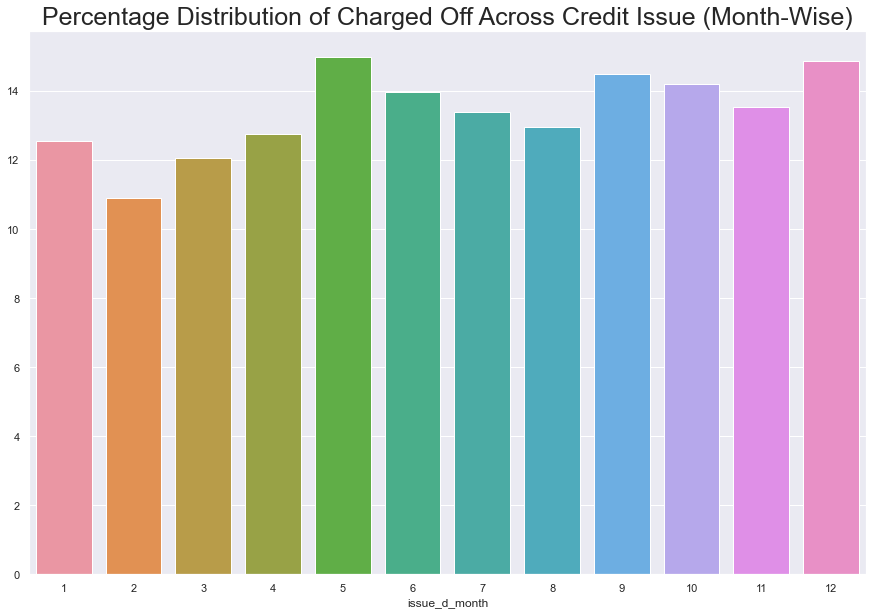

In [328]:
issue_d_mon_df = raw_data.pivot_table(index='issue_d_month', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
issue_d_mon_df['total'] = issue_d_mon_df.sum(axis=1)
issue_d_mon_df = issue_d_mon_df.iloc[:,:-1].div(issue_d_mon_df["total"], axis=0)*100
chart = sns.barplot(x = issue_d_mon_df['Charged Off'].index, y=issue_d_mon_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Credit Issue (Month-Wise)", fontdict={'fontsize': 25})
plt.show()
# issue_d_mon_df

##### We see that, as the Month Changes From January to December, proportion of members getting default also increases.
##### To verify, we'll calculate the Correlation Co-efficient to prove this behaviour mathematically.

In [329]:
headers = ['Issue Date(Month)', 'Charged Off']
pd.DataFrame(np.corrcoef(issue_d_mon_df.index, issue_d_mon_df["Charged Off"]), index=headers, columns=headers)

,Issue Date(Month),Charged Off
Issue Date(Month),1.000000,0.684987
Charged Off,0.684987,1.000000


### 3.12 Analysing Percentage of Members which are charged off on the basis of "Purpose" column

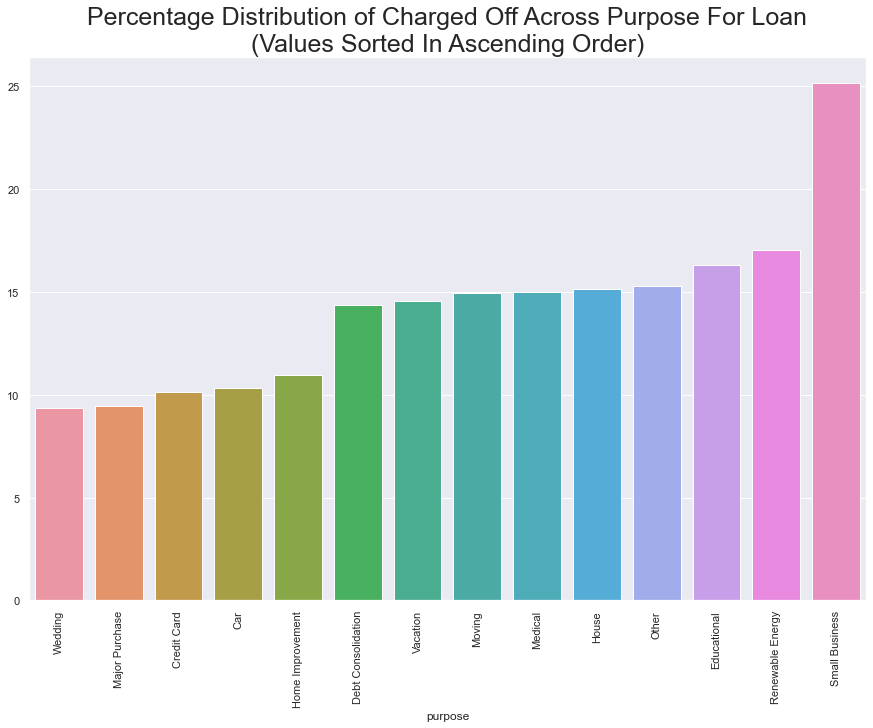

In [330]:
purpose_df = raw_data.pivot_table(index='purpose', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
purpose_df['total'] = purpose_df.sum(axis=1)
purpose_df = purpose_df.iloc[:,:-1].div(purpose_df["total"], axis=0)*100
purpose_df = purpose_df.sort_values(by=['Charged Off'])
chart = sns.barplot(x = purpose_df['Charged Off'].index, y=purpose_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Purpose For Loan\n(Values Sorted In Ascending Order)", fontdict={'fontsize': 25})
plt.show()
# purpose_df

### 3.13 Analysing Percentage of Members which are charged off on the basis of "State" column

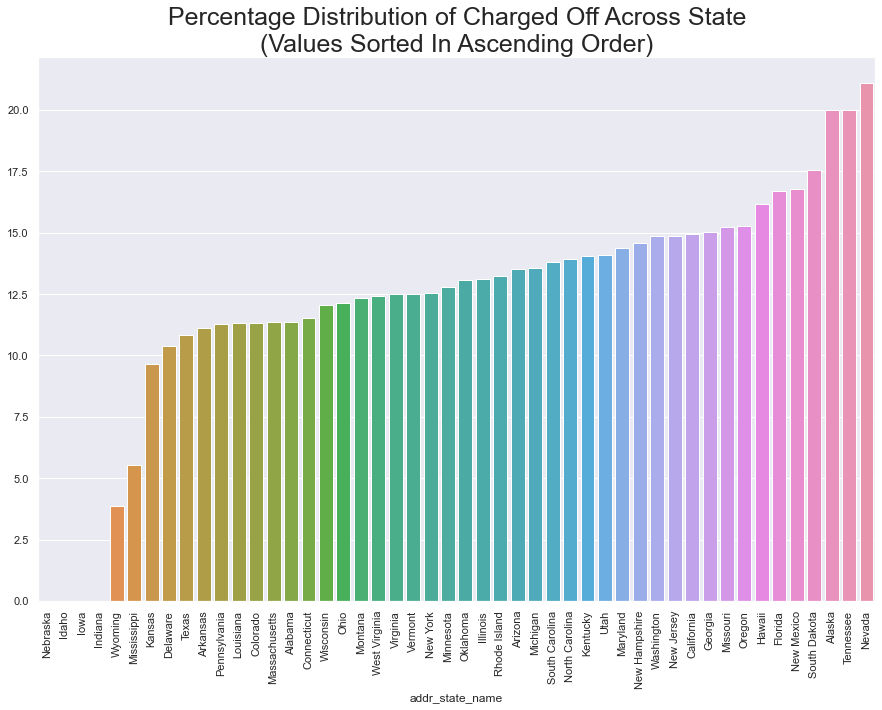

In [331]:
state_df = raw_data.pivot_table(index='addr_state_name', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
state_df['total'] = state_df.sum(axis=1)
state_df = state_df.iloc[:,:-1].div(state_df["total"], axis=0)*100
state_df = state_df.sort_values(by=['Charged Off'])
chart = sns.barplot(x = state_df['Charged Off'].index, y=state_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across State\n(Values Sorted In Ascending Order)", fontdict={'fontsize': 25})
plt.show()
# state_df

### 3.14 Analysing Percentage of Members which are charged off on the basis of "DTI" column

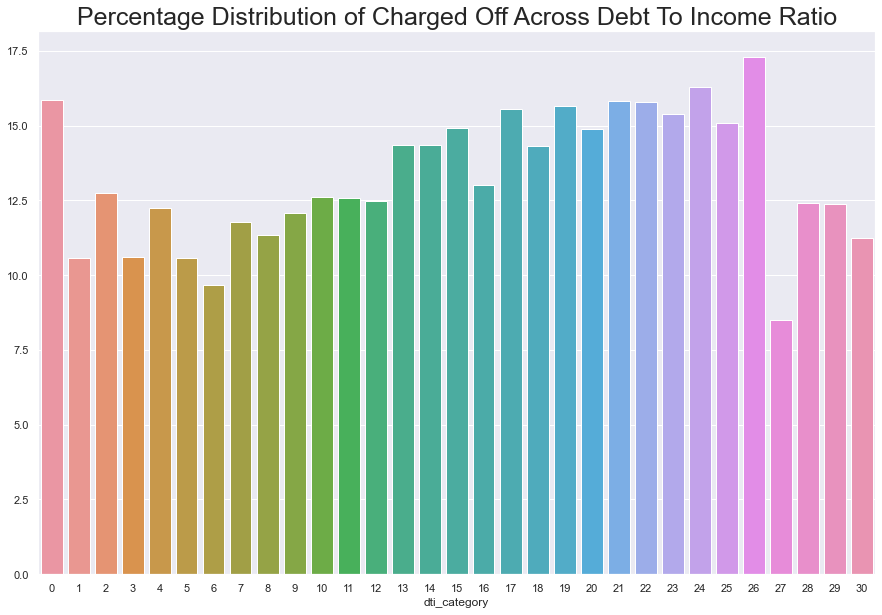

In [332]:
dti_df = raw_data.pivot_table(index='dti_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
dti_df['total'] = dti_df.sum(axis=1)
dti_df = dti_df.iloc[:,:-1].div(dti_df["total"], axis=0)*100
chart = sns.barplot(x = dti_df['Charged Off'].index, y=dti_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Debt To Income Ratio", fontdict={'fontsize': 25})
plt.show()
# dti_df

##### We see that, as the DTI increases, proportion of members getting default also increases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [333]:
headers = ['DTI', 'Charged Off']
pd.DataFrame(np.corrcoef(issue_d_mon_df.index, issue_d_mon_df["Charged Off"]), index=headers, columns=headers)

,DTI,Charged Off
DTI,1.000000,0.684987
Charged Off,0.684987,1.000000


### 3.15 Analysing Percentage of Members which are charged off on the basis of "Delinquency Count (in Last 2 Years)" column

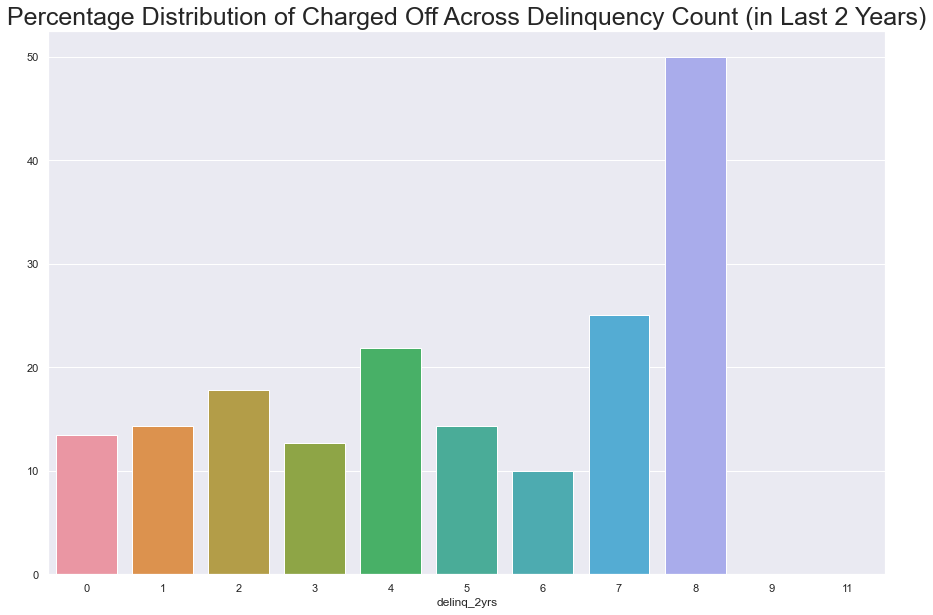

In [334]:
del_c_30_df = raw_data.pivot_table(index='delinq_2yrs', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
del_c_30_df['total'] = del_c_30_df.sum(axis=1)
del_c_30_df = del_c_30_df.iloc[:,:-1].div(del_c_30_df["total"], axis=0)*100
chart = sns.barplot(x = del_c_30_df['Charged Off'].index, y=del_c_30_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Delinquency Count (in Last 2 Years)", fontdict={'fontsize': 25})
plt.show()
# del_c_30_df

##### We see that, as the Delinquency Count increases, proportion of members getting default decreases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [335]:
headers = ['Delinquency Count', 'Charged Off']
pd.DataFrame(np.corrcoef(del_c_30_df.index, del_c_30_df["Charged Off"]), index=headers, columns=headers)

,Delinquency Count,Charged Off
Delinquency Count,1.000000,-0.066134
Charged Off,-0.066134,1.000000


### 3.16 Analysing Percentage of Members which are charged off on the basis of "Earliest Credit Line Year" column

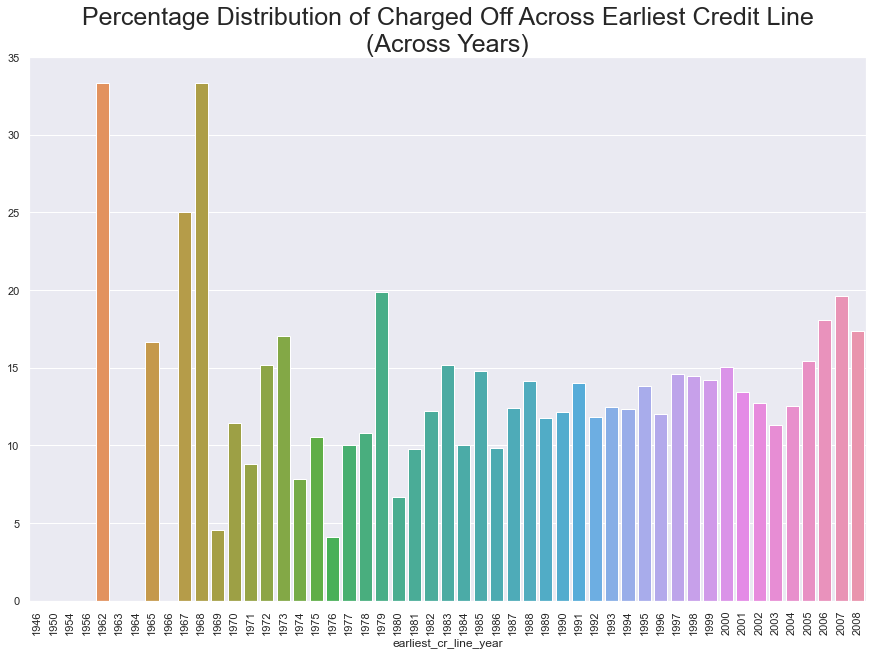

In [336]:
earliest_cr_year_df = raw_data.pivot_table(index='earliest_cr_line_year', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
earliest_cr_year_df['total'] = earliest_cr_year_df.sum(axis=1)
earliest_cr_year_df = earliest_cr_year_df.iloc[:,:-1].div(earliest_cr_year_df["total"], axis=0)*100
chart = sns.barplot(x = earliest_cr_year_df['Charged Off'].index, y=earliest_cr_year_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Earliest Credit Line\n(Across Years)", fontdict={'fontsize': 25})
plt.show()
# earliest_cr_year_df

##### We see that, as the year increases, proportion of members getting default also increases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [337]:
headers = ['Earliest Credit Line(Year)', 'Charged Off']
pd.DataFrame(np.corrcoef(earliest_cr_year_df.index, earliest_cr_year_df["Charged Off"]), index=headers, columns=headers)

,Earliest Credit Line(Year),Charged Off
Earliest Credit Line(Year),1.000000,0.360775
Charged Off,0.360775,1.000000


### 3.17 Analysing Percentage of Members which are charged off on the basis of "Earliest Credit Line Month" column

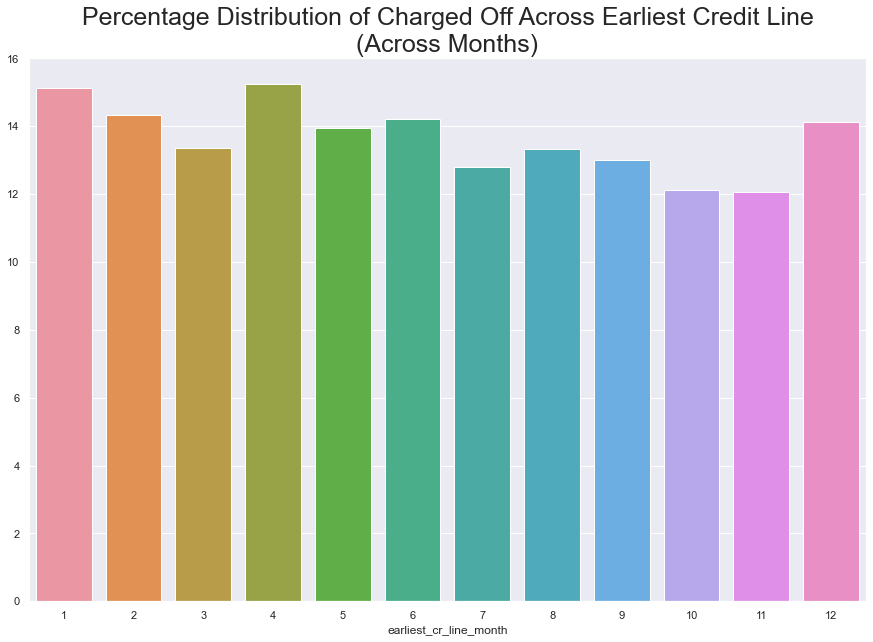

In [338]:
earliest_cr_month_df = raw_data.pivot_table(index='earliest_cr_line_month', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
earliest_cr_month_df['total'] = earliest_cr_month_df.sum(axis=1)
earliest_cr_month_df = earliest_cr_month_df.iloc[:,:-1].div(earliest_cr_month_df["total"], axis=0)*100
chart = sns.barplot(x = earliest_cr_month_df['Charged Off'].index, y=earliest_cr_month_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Earliest Credit Line\n(Across Months)", fontdict={'fontsize': 25})
plt.show()
# earliest_cr_month_df

##### We see that, as the month changes from Jan to Dec, proportion of members getting default decreases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [339]:
headers = ['Earliest Credit Line(Year)', 'Charged Off']
pd.DataFrame(np.corrcoef(earliest_cr_month_df.index, earliest_cr_month_df["Charged Off"]), index=headers, columns=headers)

,Earliest Credit Line(Year),Charged Off
Earliest Credit Line(Year),1.000000,-0.659192
Charged Off,-0.659192,1.000000


### 3.18 Analysing Percentage of Members which are charged off on the basis of "Inquiries Count (In Last 6 Months)" column

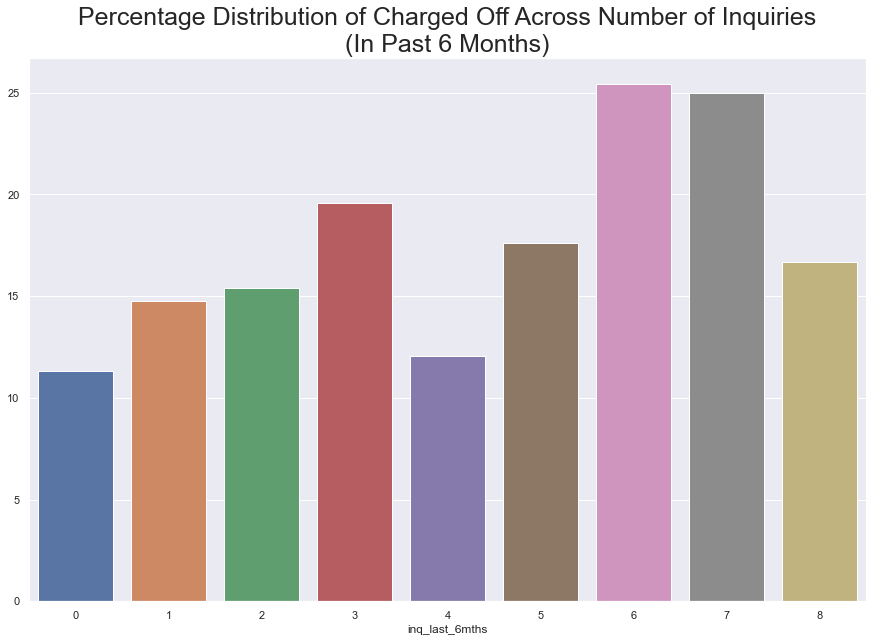

In [340]:
enq_count_df = raw_data.pivot_table(index='inq_last_6mths', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
enq_count_df['total'] = enq_count_df.sum(axis=1)
enq_count_df = enq_count_df.iloc[:,:-1].div(enq_count_df["total"], axis=0)*100
chart = sns.barplot(x = enq_count_df['Charged Off'].index, y=enq_count_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Number of Inquiries\n(In Past 6 Months)", fontdict={'fontsize': 25})
plt.show()
# enq_count_df

##### We see that, as the enquiry count increases, proportion of members getting default also increases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [341]:
headers = ['Enquiry Count', 'Charged Off']
pd.DataFrame(np.corrcoef(enq_count_df.index, enq_count_df["Charged Off"]), index=headers, columns=headers)

,Enquiry Count,Charged Off
Enquiry Count,1.000000,0.633914
Charged Off,0.633914,1.000000


### 3.19 Analysing Percentage of Members which are charged off on the basis of "Number of Credit Lines Available" column

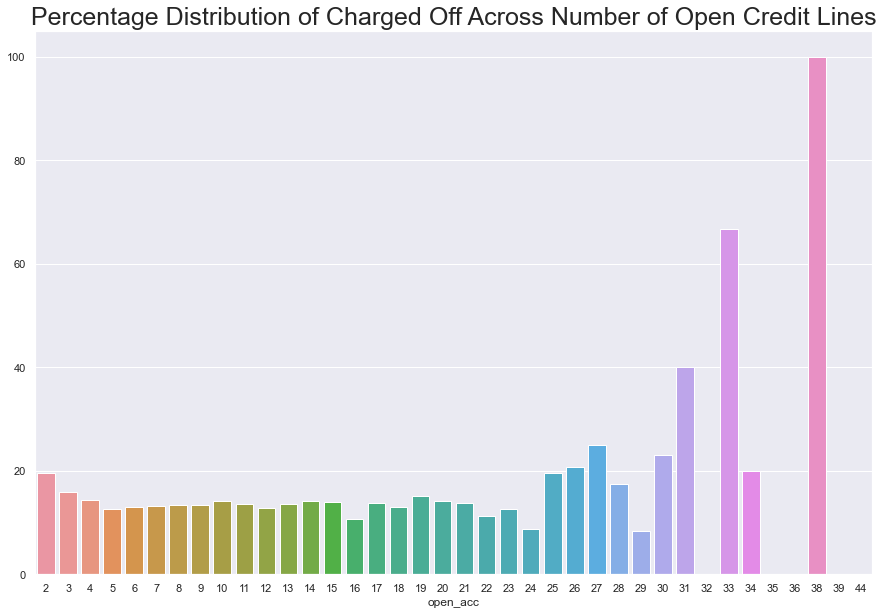

In [342]:
open_acc_df = raw_data.pivot_table(index='open_acc', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
open_acc_df['total'] = open_acc_df.sum(axis=1)
open_acc_df = open_acc_df.iloc[:,:-1].div(open_acc_df["total"], axis=0)*100
chart = sns.barplot(x = open_acc_df['Charged Off'].index, y=open_acc_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Number of Open Credit Lines", fontdict={'fontsize': 25})
plt.show()
# open_acc_df

##### We see that, as the open credit line increases, proportion of members getting default also increases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [343]:
headers = ['Enquiry Count', 'Charged Off']
pd.DataFrame(np.corrcoef(open_acc_df.index, open_acc_df["Charged Off"]), index=headers, columns=headers)

,Enquiry Count,Charged Off
Enquiry Count,1.000000,0.190401
Charged Off,0.190401,1.000000


### 3.20 Analysing Percentage of Members which are charged off on the basis of "Derogatory Public Records" column

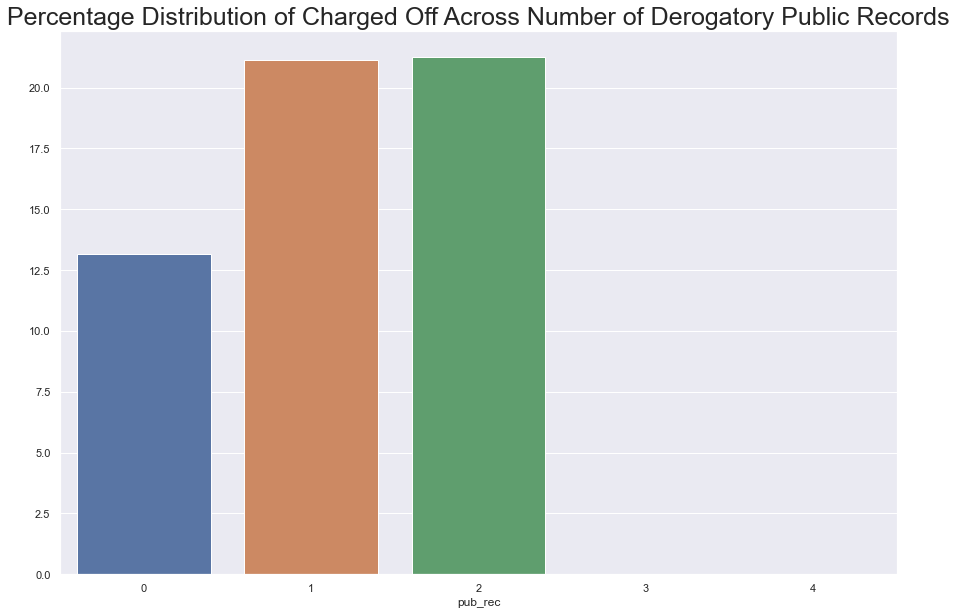

In [344]:
pub_rec_df = raw_data.pivot_table(index='pub_rec', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
pub_rec_df['total'] = pub_rec_df.sum(axis=1)
pub_rec_df = pub_rec_df.iloc[:,:-1].div(pub_rec_df["total"], axis=0)*100
chart = sns.barplot(x = pub_rec_df['Charged Off'].index, y=pub_rec_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Number of Derogatory Public Records", fontdict={'fontsize': 25})
plt.show()
# pub_rec_df

##### We see that, as the Derogatory Public Records increases, proportion of members getting default decreases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [345]:
headers = ['Derogatory Public Records', 'Charged Off']
pd.DataFrame(np.corrcoef(pub_rec_df.index, pub_rec_df["Charged Off"]), index=headers, columns=headers)

,Derogatory Public Records,Charged Off
Derogatory Public Records,1.000000,-0.703496
Charged Off,-0.703496,1.000000


### 3.21 Analysing Percentage of Members which are charged off on the basis of "Revolving Balance" column

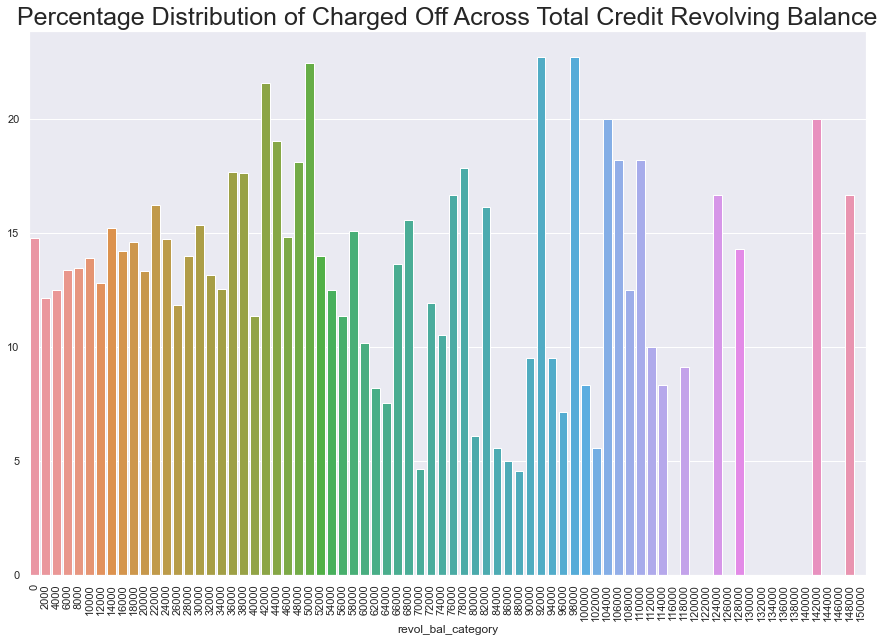

In [346]:
revol_bal_df = raw_data.pivot_table(index='revol_bal_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
revol_bal_df['total'] = revol_bal_df.sum(axis=1)
revol_bal_df = revol_bal_df.iloc[:,:-1].div(revol_bal_df["total"], axis=0)*100
chart = sns.barplot(x = revol_bal_df['Charged Off'].index, y=revol_bal_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Total Credit Revolving Balance", fontdict={'fontsize': 25})
plt.show()
# revol_bal_df

##### We see that, as the Revolving Balance increases, proportion of members getting default also increases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [347]:
headers = ['Revolving Balance', 'Charged Off']
pd.DataFrame(np.corrcoef(revol_bal_df.index, revol_bal_df["Charged Off"]), index=headers, columns=headers)

,Revolving Balance,Charged Off
Revolving Balance,1.000000,-0.507939
Charged Off,-0.507939,1.000000


### 3.22 Analysing Percentage of Members which are charged off on the basis of "Revolving Utilization Rate" column

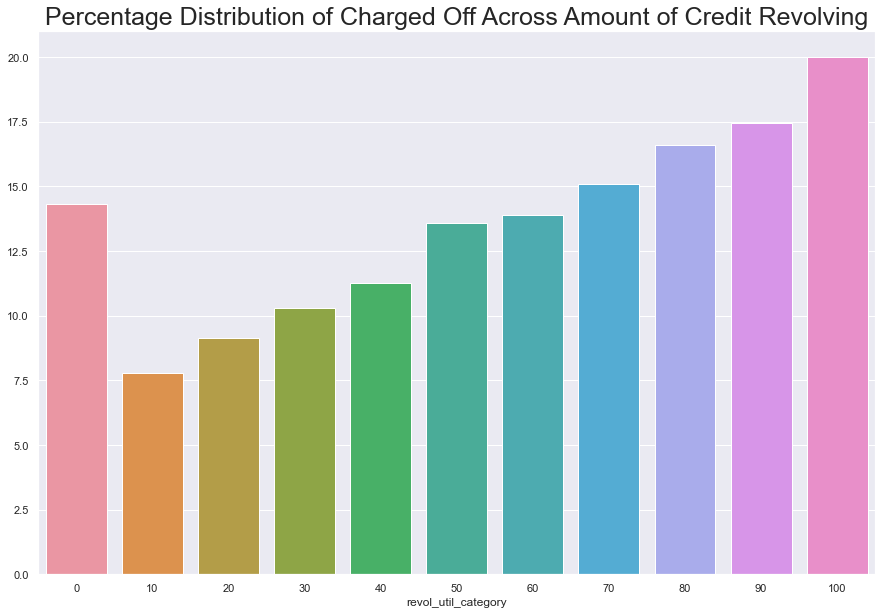

In [348]:
revol_util_df = raw_data.pivot_table(index='revol_util_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
revol_util_df['total'] = revol_util_df.sum(axis=1)
revol_util_df = revol_util_df.iloc[:,:-1].div(revol_util_df["total"], axis=0)*100
chart = sns.barplot(x = revol_util_df['Charged Off'].index, y=revol_util_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Amount of Credit Revolving", fontdict={'fontsize': 25})
plt.show()
# revol_util_df

##### We see that, as the Revolving Balance increases, proportion of members getting default also increases.
##### To verify, we'll calculate the Correlation Co-efficient to prrove this behaviour mathematically.

In [349]:
headers = ['Revolving Utilization Rate', 'Charged Off']
pd.DataFrame(np.corrcoef(revol_util_df.index, revol_util_df["Charged Off"]), index=headers, columns=headers)

,Revolving Utilization Rate,Charged Off
Revolving Utilization Rate,1.000000,0.826091
Charged Off,0.826091,1.000000


### 3.23 Analysing Percentage of Members which are charged off on the basis of "Total Credit Lines" column

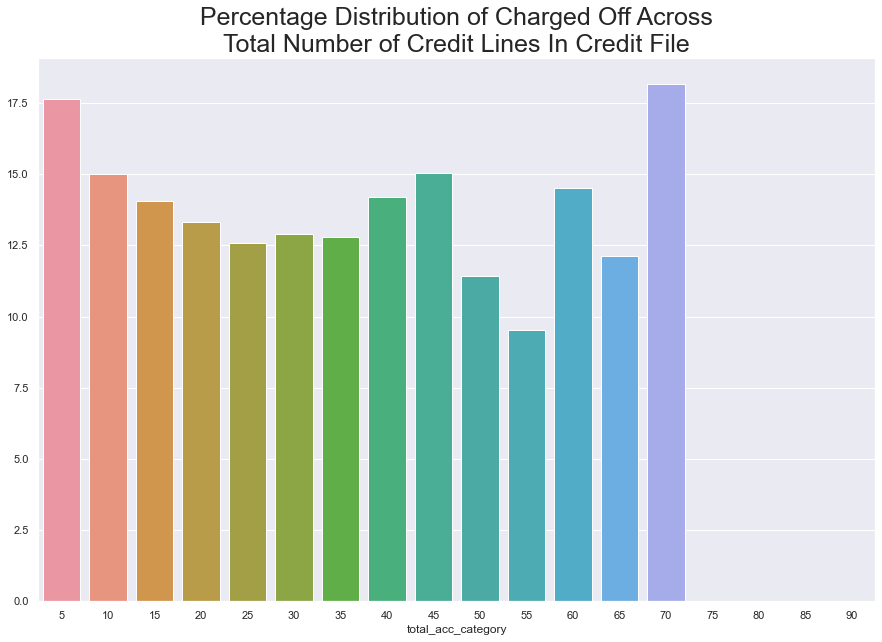

In [350]:
total_acc_df = raw_data.pivot_table(index='total_acc_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
total_acc_df['total'] = total_acc_df.sum(axis=1)
total_acc_df = total_acc_df.iloc[:,:-1].div(total_acc_df["total"], axis=0)*100
chart = sns.barplot(x = total_acc_df['Charged Off'].index, y=total_acc_df['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across\nTotal Number of Credit Lines In Credit File", fontdict={'fontsize': 25})
plt.show()
# total_acc_df

##### We see that, as the Total Credit Line increases, proportion of members getting default decreases.
##### To verify, we'll calculate the Correlation Co-efficient to proove this behaviour mathematically.

In [351]:
headers = ['Total Number of Credit Lines', 'Charged Off']
pd.DataFrame(np.corrcoef(total_acc_df.index, total_acc_df["Charged Off"]), index=headers, columns=headers)

,Total Number of Credit Lines,Charged Off
Total Number of Credit Lines,1.000000,-0.722683
Charged Off,-0.722683,1.000000


### 3.24 Analysing Percentage of Members which are charged off on the basis of "Remaining Oustanding Principal" column

In [352]:
out_prncp_df = raw_data.pivot_table(index='out_prncp_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
out_prncp_df['total'] = out_prncp_df.sum(axis=1)
out_prncp_df = out_prncp_df.iloc[:,:-1].div(out_prncp_df["total"], axis=0)*100
# chart = sns.barplot(x = out_prncp_df['Charged Off'].index, y=out_prncp_df['Charged Off'].values)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
# plt.title("Percentage Distribution of Charged Off Across Remaining Outstanding Principal", fontdict={'fontsize': 25})
# plt.show()
# out_prncp_df

In [353]:
out_prncp_df['Charged Off']

out_prncp_category
0       13.976306
100      0.000000
200      0.000000
300      0.000000
400      0.000000
500      0.000000
600      0.000000
700      0.000000
800      0.000000
900      0.000000
1000     0.000000
1100     0.000000
1200     0.000000
1300     0.000000
1400     0.000000
1500     0.000000
1600     0.000000
1700     0.000000
1800     0.000000
1900     0.000000
2000     0.000000
2100     0.000000
2200     0.000000
2300     0.000000
2400     0.000000
2500     0.000000
2600     0.000000
2700     0.000000
2800     0.000000
2900     0.000000
3000     0.000000
3100     0.000000
3200     0.000000
3300     0.000000
3400     0.000000
3500     0.000000
3600     0.000000
3700     0.000000
3800     0.000000
3900     0.000000
4000     0.000000
4100     0.000000
4200     0.000000
4300     0.000000
4400     0.000000
4500     0.000000
4600     0.000000
4700     0.000000
4800     0.000000
4900     0.000000
5000     0.000000
5100     0.000000
5300     0.000000
5400     0.000000
5500     

### 3.25 Analysing Percentage of Members which are charged off on the basis of "Remaining Oustanding Principal (Of Total Amount Funded by Investors)" column

In [354]:
out_prncp_inv_df = raw_data.pivot_table(index='out_prncp_inv_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
out_prncp_inv_df['total'] = out_prncp_inv_df.sum(axis=1)
out_prncp_inv_df = out_prncp_inv_df.iloc[:,:-1].div(out_prncp_inv_df["total"], axis=0)*100
# chart = sns.barplot(x = out_prncp_inv_df['Charged Off'].index, y=out_prncp_inv_df['Charged Off'].values)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
# plt.title("Percentage Distribution of Charged Off Across Outstanding Principal\nFor Portion of Total Amount Funded by Investors", fontdict={'fontsize': 25})
# plt.show()
# out_prncp_inv_df

In [355]:
out_prncp_inv_df['Charged Off']

out_prncp_inv_category
0       13.976306
100      0.000000
200      0.000000
300      0.000000
400      0.000000
500      0.000000
600      0.000000
700      0.000000
800      0.000000
900      0.000000
1000     0.000000
1100     0.000000
1200     0.000000
1300     0.000000
1400     0.000000
1500     0.000000
1600     0.000000
1700     0.000000
1800     0.000000
1900     0.000000
2000     0.000000
2100     0.000000
2200     0.000000
2300     0.000000
2400     0.000000
2500     0.000000
2600     0.000000
2700     0.000000
2800     0.000000
2900     0.000000
3000     0.000000
3100     0.000000
3200     0.000000
3300     0.000000
3400     0.000000
3500     0.000000
3600     0.000000
3700     0.000000
3800     0.000000
3900     0.000000
4000     0.000000
4100     0.000000
4200     0.000000
4300     0.000000
4400     0.000000
4500     0.000000
4600     0.000000
4700     0.000000
4800     0.000000
4900     0.000000
5000     0.000000
5100     0.000000
5200     0.000000
5300     0.000000
5400 